In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<h1>Data Load</h1>

In [2]:
def load_data():
    data = pd.read_csv('Shopping-Mall-Customer-Data .csv')
    return data

In [3]:
data = load_data()
data

Customer ID  Age  Gender  Annual Income  \
0      d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1      1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2      e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3      9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4      64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   
...                                     ...  ...     ...            ...   
15074  a0504768-a85f-4930-ac24-55bc8e4fec9e   29  Female          97723   
15075  a08c4e0e-d1fe-48e7-9366-aab11ae409cd   22    Male          73361   
15076  0e87c25a-268c-401a-8ba1-7111dcde6f1a   18  Female         112337   
15077  5f388cbe-3373-4e16-b743-38f508f2249f   26  Female          94312   
15078  b8b8f561-ebca-4401-8afe-544c906554ba   19    Male          78045   

       Spending Score  
0                  89  
1                  95  
2                  76  
3                  57  
4                  76  
...               ...  
15074              30  
15075              74  
15076              48  
15077               5  
15078               2  

[15079 rows x 5 columns]

In [6]:
def data_cleaning(data):
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    return data

In [7]:
data = data_cleaning(data)

<h1>Data Encoding</h1>

<h1>EDA</h1>

In [8]:
def perform_eda(data):

    plt.figure(figsize=(10, 6))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
    
    #gender distribution
    genders = data.Gender.value_counts()

    # Set the style and background color
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    sns.set_palette("pastel")
    sns.barplot(x=genders.index, y=genders.values)

    # Removing grid lines
    sns.despine(left=True)
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.title("Gender Distribution")
    plt.show()
    
    #age analysis
    plt.figure(figsize=(10, 6))
    sns.set_style("white")
    age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
    age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
    age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
    age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
    age56_65 = data.Age[(data.Age <= 65) & (data.Age >= 56)]
    age_over65 = data.Age[data.Age >= 56]

    x = ["18-25","26-35","36-45","46-55","56-65","65+"]
    y = [len(age18_25.values),len(age26_35.values),len(age36_45.values)
         ,len(age46_55.values),len(age56_65.values),len(age_over65.values)]
    #plt.figure(figsize=(15,6))
    sns.barplot(x=x, y=y, palette="Blues")
    plt.title("Number of Customer and Ages")
    plt.xlabel("Age")
    plt.ylabel("Number of Customer")
    plt.show()

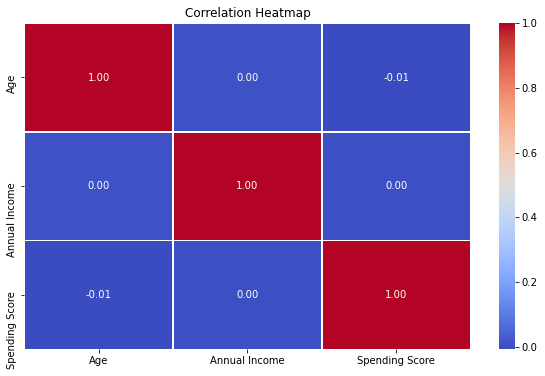

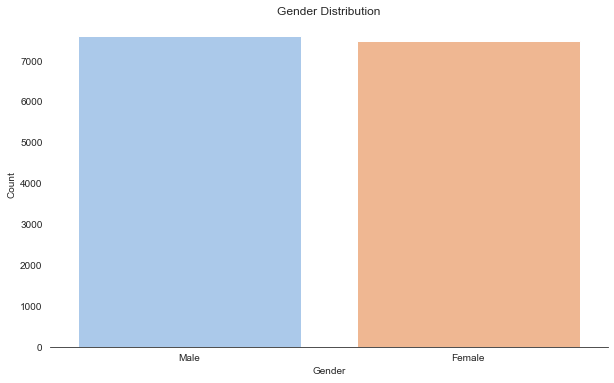

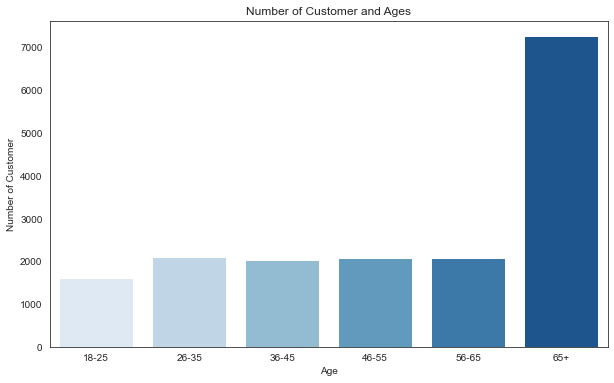

In [9]:
perform_eda(data)

In [10]:
def encode_categorical(data, categorical_cols):
    existing_cols = [col for col in categorical_cols if col in data.columns]
    if not existing_cols:
        print("No categorical columns found for encoding.")
        return data
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_data = encoder.fit_transform(data[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
    data = data.drop(categorical_cols, axis=1).join(encoded_df)
    print("Categorical columns encoded.")
    return data

In [11]:
data = encode_categorical(data, categorical_cols=['Gender'])

Categorical columns encoded.


<h1>Features Importance</h1>

In [12]:
def know_your_features(data):
    print(data.info())
    print(data.describe())
    print(data['Gender'].value_counts())
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

<h1>Features Selection</h1>

In [13]:
def feature_selection(data, feature_cols):
    data = data[feature_cols]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    print("Features selected and scaled.")
    return data_scaled

In [14]:
data_scaled = feature_selection(data, feature_cols=['Age', 'Annual Income', 'Spending Score'])

Features selected and scaled.


<h1>Pre-clustering tSNE and PCA</h1>

In [15]:
def pre_clustering_visualization(data_scaled):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data_scaled)
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(data_scaled)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], ax=axes[0])
    axes[0].set_title("PCA - Pre-clustering")
    
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], ax=axes[1])
    axes[1].set_title("t-SNE - Pre-clustering")
    plt.show()

C:\Users\mkami\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mkami\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


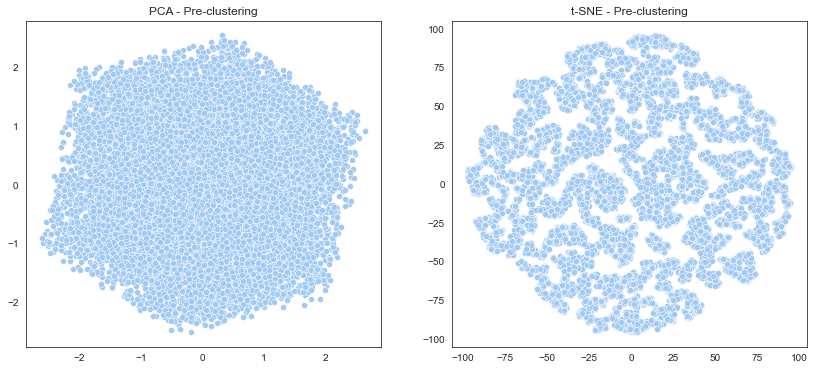

In [14]:
pre_clustering_visualization(data_scaled)

<h2>Interpretation</h2>
<h4>In PCA, the data points seem to form a dense cluster which are indicating that customers might be relatively homogeneous.
The spread of points along the axes shows that the directions of maximum variance. highlight features that differentiate customers but here the clustering doesn't reveal distinct groups.
T-Sne is similar to PCA, the data points are densely packed it means a lack of clear clusters but it revealing local relationships between data points. While there isn't a strong global structure there might be subtle local clusters within the dataset.<hr>
Both plots demonstrate a lack of distinct clusters suggesting a relatively homogeneous customer base. This homogeneity could be attributed to factors like similar demographics, shared shopping habits etc.
<hr>
so we can say that PCA focusing on global structure where it shows a dense cluster of data points while t-SNE emphasizing local relationships also highlights a lack of clear separations.

</h4>

<h1>Hierarchical clustering (Agglomerative)</h1>

In [16]:
def hierarchical_clustering(data_scaled):
    linkage_matrix = linkage(data_scaled, method='ward')
    
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title("Dendrogram for Hierarchical Clustering")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

    # Select k based on dendrogram 
    k = 6  
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    print(f"Clusters formed with k={k}")
    return clusters, k

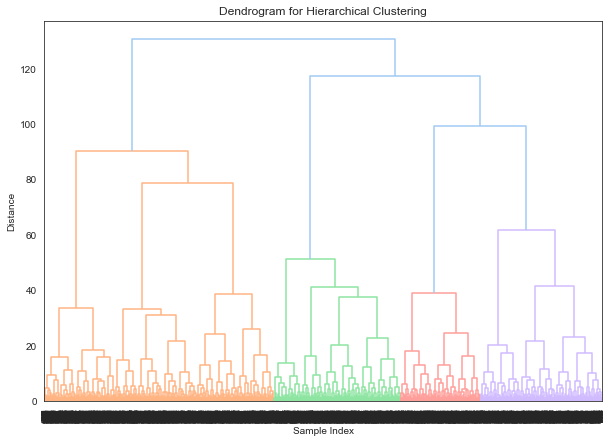

Clusters formed with k=6


In [17]:
clusters, k = hierarchical_clustering(data_scaled)

<h2>Dendrogram Interpretation</h2>
<h4>
- Dendrogram shows how data points are grouped together based on their similarity <hr>
- here we can identify the optimal number of clusters (k) by looking for a significant gap . In dendrogram, cutting the tree at a distance of around 60 seems to yield six well defined clusters. We can see talest gaps in the dendrogram at this level which suggesting  separation between the clusters.<hr>
</h4>

<h1>Post-clustering tSNE and PCA</h1>

In [18]:
def post_clustering_visualization(data_scaled, clusters):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data_scaled)
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(data_scaled)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="viridis", ax=axes[0])
    axes[0].set_title("PCA - Post-clustering")
    
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=clusters, palette="viridis", ax=axes[1])
    axes[1].set_title("t-SNE - Post-clustering")
    plt.show()

C:\Users\mkami\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mkami\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


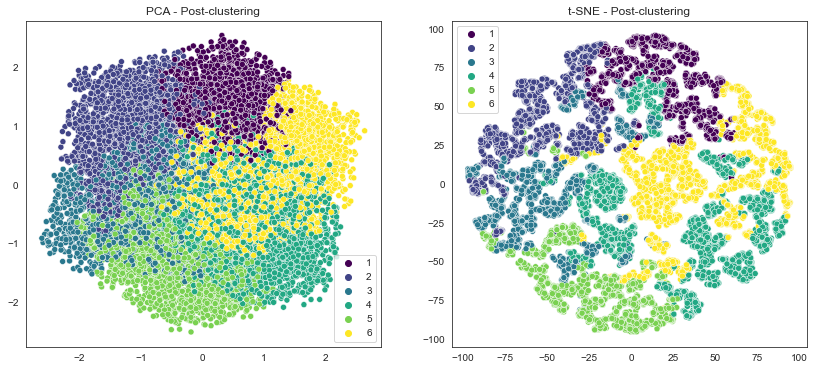

In [19]:
post_clustering_visualization(data_scaled, clusters)

<h2>Post-clustering tSNE and PCA Interpretations</h2>

<h4>
- The PCA plot shows distinct clusters that the hierarchical clustering algorithm has effectively separated customers into groups with similar characteristics.<hr>
- features captured by the principal components are relevant for differentiating customer segments <br>
- The density of points within each cluster  provide insights into the homogeneity of the cluster.<br><br>
    
- t-SNE plot also shows distinct clusters confirming the effectiveness of the hierarchical clustering.
- t-SNE showing non-linear relationships between data points. The clusters in the t-SNE plot exhibit complex, non-linear structures that are not apparent in the PCA plot.<br>
 
- separation of clusters in both plots suggests that the hierarchical clustering algorithm has successfully identified meaningful groups of customers based on their shared characteristics.
</h4>

<h1>Radar Chart</h1>

In [20]:
#pip install plotly
def radar_plot(data, clusters):
    data['Cluster'] = clusters
    cluster_means = data.groupby('Cluster').mean()

    scaler = StandardScaler()
    cluster_means_scaled = scaler.fit_transform(cluster_means)
    cluster_means_scaled_df = pd.DataFrame(cluster_means_scaled, columns=cluster_means.columns)

    categories = cluster_means.columns  

    fig = go.Figure()

    for i in range(cluster_means_scaled_df.shape[0]):
        fig.add_trace(go.Scatterpolar(
            r=cluster_means_scaled_df.iloc[i].values,
            theta=categories,
            fill='toself',
            name=f"Cluster {i+1}"
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[-2, 2])
        ),
        title="Cluster Radar Plot",
        showlegend=True
    )

    fig.show()

In [21]:
radar_plot(data, clusters)

<h1>Interpretation</h1>
<h2>Radar chart visualize the average values of the three features (Annual Income, Age, and Spending Score) for each of the six clusters identified </h2>
    <ul>
        <li>Cluster 1: Have a relatively high average annual income and spending score, along with a moderate age.It represent a group of affluent individuals who enjoy shopping</li>
        <li>Cluster 2:  shows a lower average annual income and spending score compared to Cluster 1. However, the age range is wider, suggesting a mix of younger and older individuals with moderate spending habits.</li>
        <li>Cluster 3:has a low average annual income and spending score, indicating a group of budget-conscious individuals, possibly students or young professionals.</li>
        <li>Cluster 4:characterized by a high average spending score and a moderate age range. represent a group of impulsive shoppers who enjoy spending on luxury items.</li>
        <li>Cluster 5: has a high average annual income and a moderate age range. They are likely to be affluent individuals who are conscious of their spending but still enjoy purchasing quality products.</li>
        <li>Cluster 6: has a low average annual income and a moderate age range. They might be individuals who are price-sensitive and look for value-for-money products.</li>
    </ul>


<h1>Comparison Kmean with Hierarchical Clustermering</h1>

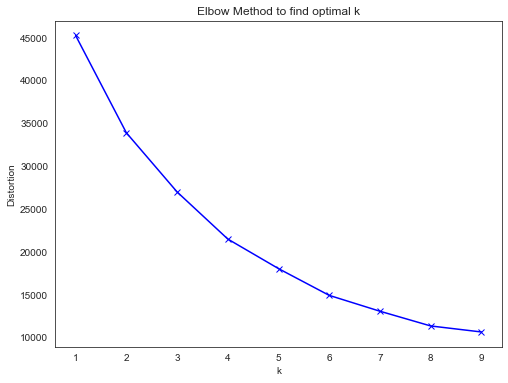

In [22]:
distortions = []
K = range(1, 10)
for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data_scaled)
        distortions.append(kmeanModel.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method to find optimal k')
plt.show()

In [24]:
def compare_kmeans_hierarchical(data_scaled, k_hier=6, k_kmeans=6):
    #  Hierarchical Clustering
    linkage_matrix = linkage(data_scaled, method='ward')
    hier_clusters = fcluster(linkage_matrix, k_hier, criterion='maxclust')
    hier_silhouette = silhouette_score(data_scaled, hier_clusters)
    print(f"Hierarchical Clustering Silhouette Score: {hier_silhouette:.2f}")
    
    # K-Means Clustering
    kmeans = KMeans(n_clusters=k_kmeans, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
    print(f"K-Means Clustering Silhouette Score: {kmeans_silhouette:.2f}")
    
    # PCA Visualization for K-Means Clustering
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    plt.title("K-Means Clustering with PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    
    #  t-SNE Visualization for K-Means Clustering
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(data_scaled)
    plt.subplot(1, 2, 2)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    plt.title("K-Means Clustering with t-SNE")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()
    
    #  Radar Chart for K-Means Clustering
    radar_labels = ['Age', 'Annual Income', 'Spending Score', 'Component 4', 'Component 5']
    cluster_centers = kmeans.cluster_centers_[:, :len(radar_labels)]
    
    fig = go.Figure()
    for i in range(k_kmeans):
        fig.add_trace(go.Scatterpolar(
            r=cluster_centers[i],
            theta=radar_labels,
            fill='toself',
            name=f'Cluster {i+1}'
        ))
    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, np.max(cluster_centers)])),
        title="K-Means Cluster Centers Radar Chart"
    )
    fig.show()
    
    print("Comparison Summary:")
    print(f"Silhouette Score - Hierarchical Clustering: {hier_silhouette:.2f}")
    print(f"Silhouette Score - K-Means Clustering: {kmeans_silhouette:.2f}")
    print("Differences: Hierarchical clustering may capture different patterns due to merging approach, while K-means directly assigns points to clusters.")


Hierarchical Clustering Silhouette Score: 0.21
K-Means Clustering Silhouette Score: 0.29


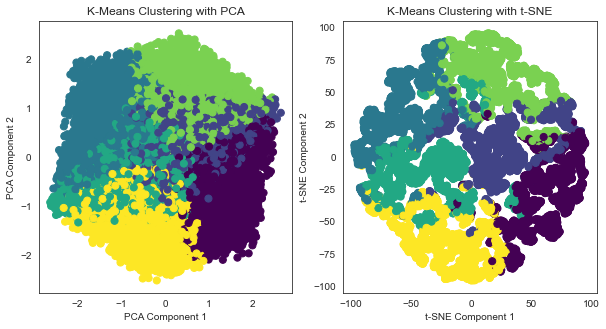

Comparison Summary:
Silhouette Score - Hierarchical Clustering: 0.21
Silhouette Score - K-Means Clustering: 0.29
Differences: Hierarchical clustering may capture different patterns due to merging approach, while K-means directly assigns points to clusters.


In [25]:
compare_kmeans_hierarchical(data_scaled)

<h3>
K-Means Cluster Centers Radar Chart shows the average values of the three features (Annual Income, Age, and Spending Score) for each of the six clusters identified through K-Means clustering. <bt>
the chart reveals significant overlap between the clusters, indicating that they are not well-separated and may not represent distinct customer segments.
</h3>